In [87]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score





%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


In [147]:
df = pd.read_csv('medical_clean.csv')

In [3]:
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  ...  TotalCharge Additional_charges Item1 Item2  Item3  \
0  34.34960 -86.72508  ...  3726.702860       17939.403420     3     3      2   
1  30.84513 -85.22907  ...  4193.190458       17612.998120     3     4      3   
2  43.54321 -96.63772  ...  2434.234222       17505.192460     2     4      4   
3  43.89744 -93.51479  ...  2127.830423       12993.437350     3     5      5   
4  37.59894 -76.88958  ...  2113.073274        3716.525786     2     1      3   

   Item4  Item5 Item6 Item7 Item8  
0      2      4     3     3     4  
1      4      4     4     3     3  
2      4      3     4     3     3  
3      3      4     5     5     5  
4      3      5     3     4     3  

[5 rows x 50 columns]

In [4]:
df.shape

(10000, 50)

In [5]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [6]:
df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City','County',\
         'Zip', 'Lat', 'Lng','County', 'Zip', 'Lat', 'Lng'], axis = 1)

State  Population      Area          TimeZone  \
0       AL        2951  Suburban   America/Chicago   
1       FL       11303     Urban   America/Chicago   
2       SD       17125  Suburban   America/Chicago   
3       MN        2162  Suburban   America/Chicago   
4       VA        5287     Rural  America/New_York   
...    ...         ...       ...               ...   
9995    NC        4762     Urban  America/New_York   
9996    NJ        1251     Urban  America/New_York   
9997    TN         532     Rural   America/Chicago   
9998    SD         271     Rural    America/Denver   
9999    PA       41524     Urban  America/New_York   

                                       Job  Children  Age    Income  \
0         Psychologist, sport and exercise         1   53  86575.93   
1             Community development worker         3   51  46805.99   
2                  Chief Executive Officer         3   53  14370.14   
3                      Early years teacher         0   78  39741.49   
4              Health promotion specialist         1   22   1209.56   
...                                    ...       ...  ...       ...   
9995                Programmer, multimedia         2   25  45967.61   
9996         Restaurant manager, fast food         4   87  14983.02   
9997            Psychologist, occupational         3   45  65917.81   
9998  Outdoor activities/education manager         3   43  29702.32   
9999            Sports development officer         8   70  62682.63   

        Marital  Gender  ...  TotalCharge  Additional_charges  Item1  Item2  \
0      Divorced    Male  ...  3726.702860        17939.403420      3      3   
1       Married  Female  ...  4193.190458        17612.998120      3      4   
2       Widowed  Female  ...  2434.234222        17505.192460      2      4   
3       Married    Male  ...  2127.830423        12993.437350      3      5   
4       Widowed  Female  ...  2113.073274         3716.525786      2      1   
...         ...     ...  ...          ...                 ...    ...    ...   
9995    Widowed    Male  ...  6850.942000         8927.642000      3      2   
9996    Widowed    Male  ...  7741.690000        28507.150000      3      3   
9997  Separated  Female  ...  8276.481000        15281.210000      3      3   
9998   Divorced    Male  ...  7644.483000         7781.678000      5      5   
9999  Separated  Female  ...  7887.553000        11643.190000      4      3   

      Item3 Item4 Item5 Item6 Item7 Item8  
0         2     2     4     3     3     4  
1         3     4     4     4     3     3  
2         4     4     3     4     3     3  
3         5     3     4     5     5     5  
4         3     3     5     3     4     3  
...     ...   ...   ...   ...   ...   ...  
9995      2     3     4     3     4     2  
9996      4     2     5     3     4     4  
9997      3     4     4     2     3     2  
9998      3     4     4     3     4     3  
9999      3     2     3     6     4     3  

[10000 rows x 41 columns]

In [7]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CaseOrder :10000
The number of values for feature Customer_id :10000
The number of values for feature Interaction :10000
The number of values for feature UID :10000
The number of values for feature City :6072
The number of values for feature State :52
The number of values for feature County :1607
The number of values for feature Zip :8612
The number of values for feature Lat :8588
The number of values for feature Lng :8725
The number of values for feature Population :5951
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature TimeZone :26 -- ['America/Adak' 'America/Anchorage' 'America/Boise' 'America/Chicago'
 'America/Denver' 'America/Detroit' 'America/Indiana/Indianapolis'
 'America/Indiana/Knox' 'America/Indiana/Marengo'
 'America/Indiana/Tell_City' 'America/Indiana/Vevay'
 'America/Indiana/Vincennes' 'America/Indiana/Winamac'
 'America/Kentucky/Louisville' 'America/Los_Angeles' 'America/Menominee'


In [8]:

df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City','County', 'Zip', 
         'Lat', 'Lng','County', 'Zip', 'Lat', 'Lng','Population','Job','Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8','TimeZone'], axis = 1)

In [9]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature State :52
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature Children :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Age :72
The number of values for feature Income :9993
The number of values for feature Marital :5 -- ['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']
The number of values for feature Gender :3 -- ['Female' 'Male' 'Nonbinary']
The number of values for feature ReAdmis :2 -- ['No' 'Yes']
The number of values for feature VitD_levels :9976
The number of values for feature Doc_visits :9 -- [1 2 3 4 5 6 7 8 9]
The number of values for feature Full_meals_eaten :8 -- [0 1 2 3 4 5 6 7]
The number of values for feature vitD_supp :6 -- [0 1 2 3 4 5]
The number of values for feature Soft_drink :2 -- ['No' 'Yes']
The number of values for feature Initial_admin :3 -- ['Elective Admission' 'Emergency Admission' 'Observation Admission']
The number of values for f

In [10]:
df.isnull().sum()

State                 0
Area                  0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

In [11]:
vals = df[['Children','Age','VitD_levels','Doc_visits','Full_meals_eaten',\
           'vitD_supp','Initial_days', 'TotalCharge','Additional_charges','ReAdmis', 'Income']]

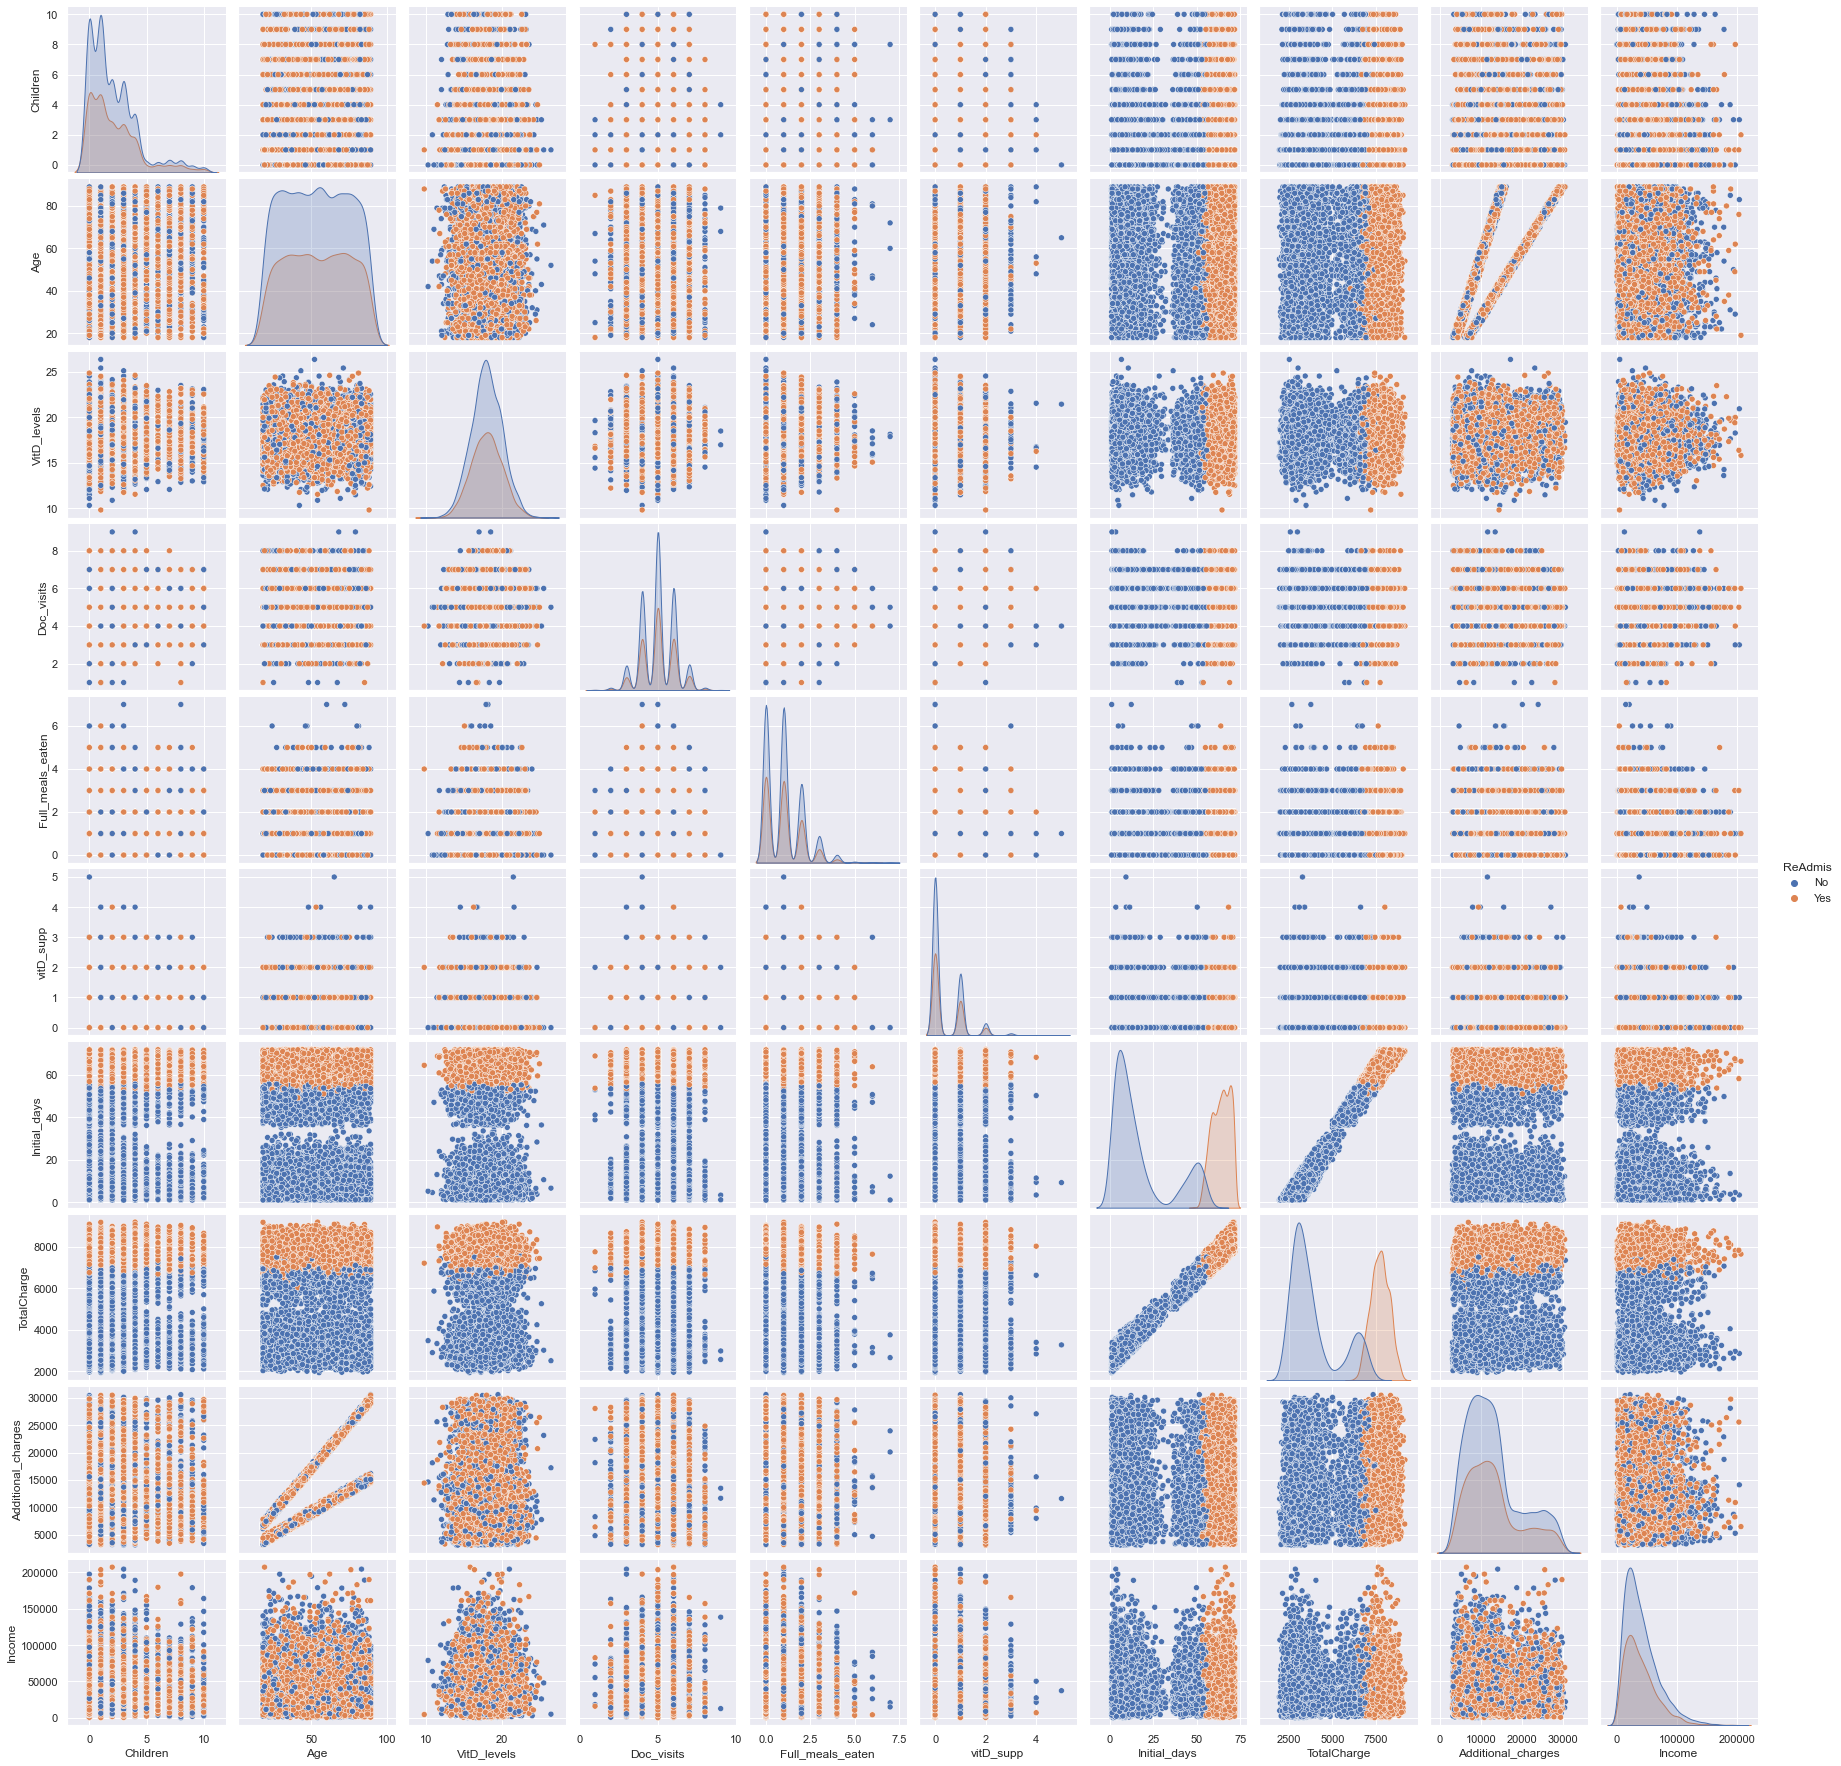

In [12]:
g = sns.pairplot(vals, hue = 'ReAdmis')

In [13]:
features = ['Area','Marital', 'Gender', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services']

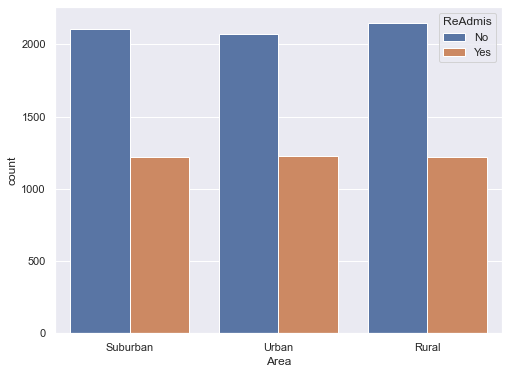

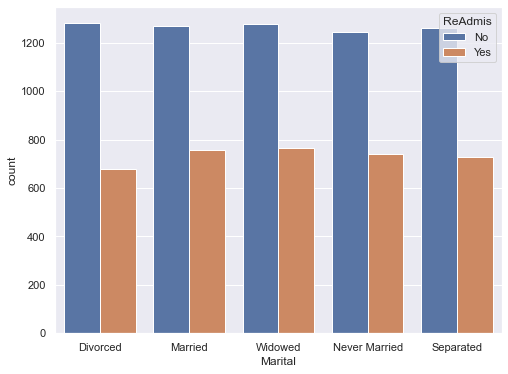

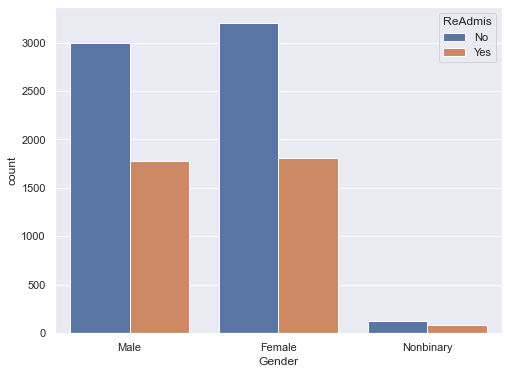

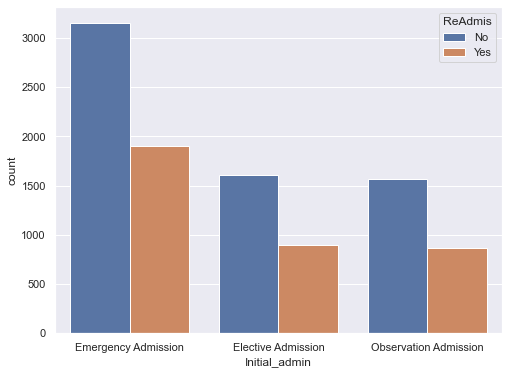

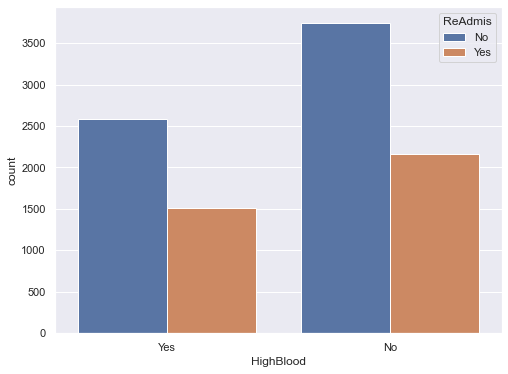

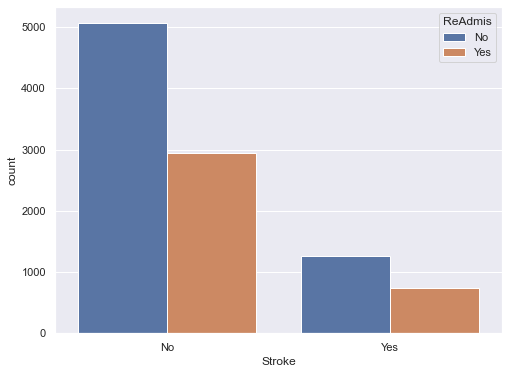

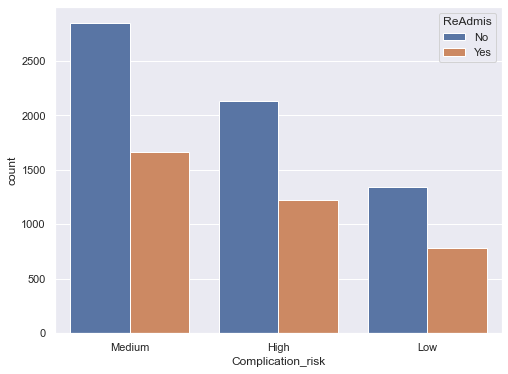

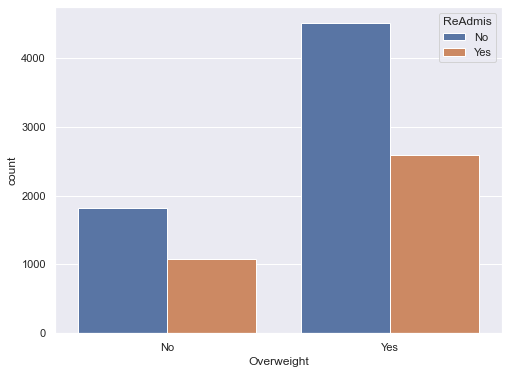

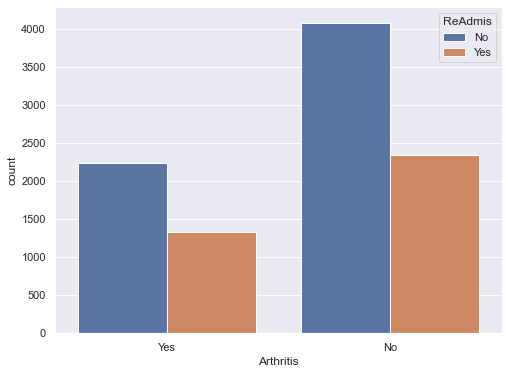

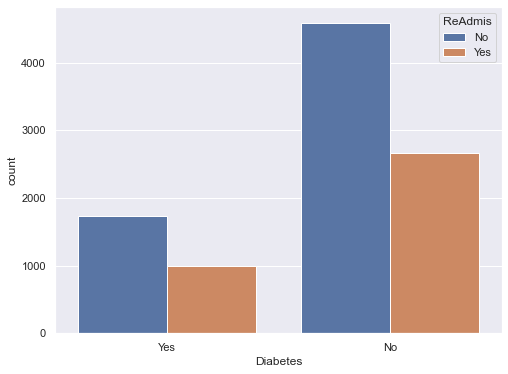

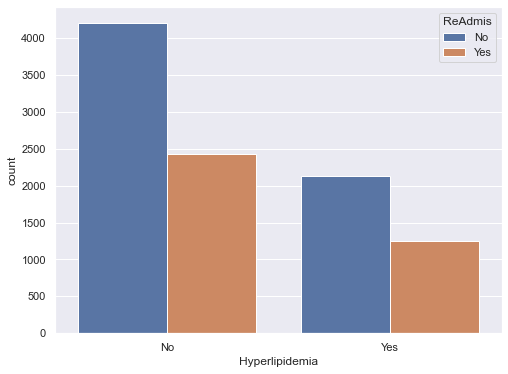

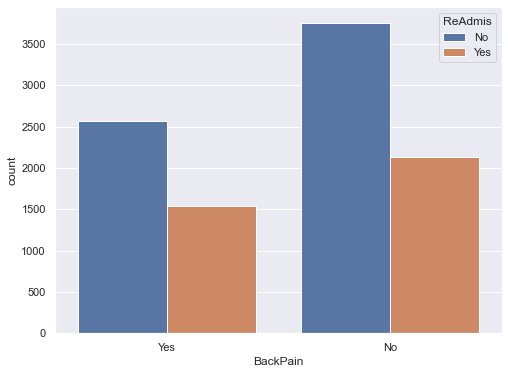

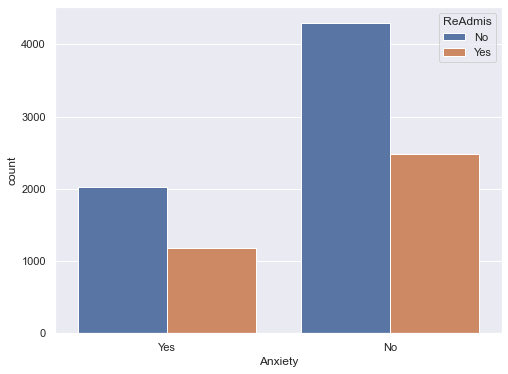

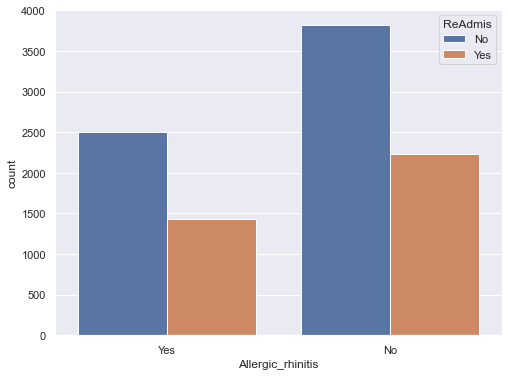

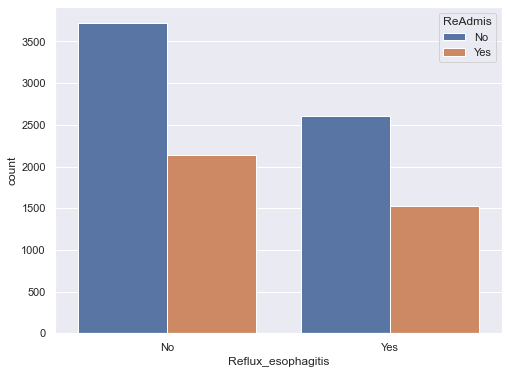

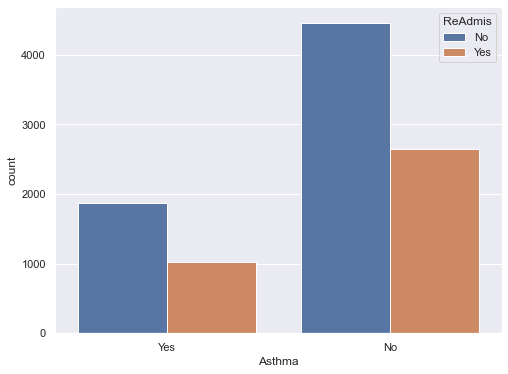

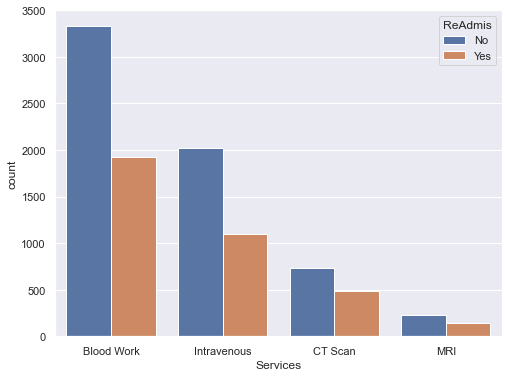

In [14]:
for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data = df, hue = 'ReAdmis')

In [149]:
df = pd.get_dummies(df)

In [16]:
print(df.head)

<bound method NDFrame.head of       Children  Age    Income  VitD_levels  Doc_visits  Full_meals_eaten  \
0            1   53  86575.93    19.141466           6                 0   
1            3   51  46805.99    18.940352           4                 2   
2            3   53  14370.14    18.057507           4                 1   
3            0   78  39741.49    16.576858           4                 1   
4            1   22   1209.56    17.439069           5                 0   
...        ...  ...       ...          ...         ...               ...   
9995         2   25  45967.61    16.980860           4                 2   
9996         4   87  14983.02    18.177020           5                 0   
9997         3   45  65917.81    17.129070           4                 2   
9998         3   43  29702.32    19.910430           5                 2   
9999         8   70  62682.63    18.388620           5                 0   

      vitD_supp  Initial_days  TotalCharge  Additional_ch

In [17]:
df.corr()

Children       Age    Income  VitD_levels  Doc_visits  \
Children              1.000000  0.009836  0.007176     0.009487   -0.002292   
Age                   0.009836  1.000000 -0.012228     0.010315    0.006898   
Income                0.007176 -0.012228  1.000000    -0.013115    0.013464   
VitD_levels           0.009487  0.010315 -0.013115     1.000000    0.010210   
Doc_visits           -0.002292  0.006898  0.013464     0.010210    1.000000   
...                        ...       ...       ...          ...         ...   
Asthma_Yes            0.002324  0.009229  0.005904     0.004937   -0.017989   
Services_Blood Work  -0.009050 -0.013355 -0.000123     0.001475    0.003403   
Services_CT Scan      0.001541  0.009506 -0.007827     0.008048    0.014600   
Services_Intravenous  0.010741  0.004142  0.006678    -0.001984   -0.008700   
Services_MRI         -0.005061  0.008529 -0.002456    -0.012840   -0.012822   

                      Full_meals_eaten  vitD_supp  Initial_days  TotalCharge  \
Children                      0.003835  -0.004319      0.022467     0.024100   
Age                           0.008555   0.010014      0.016264     0.016876   
Income                       -0.011365   0.001253     -0.012465    -0.014345   
VitD_levels                   0.023223  -0.007203     -0.003642    -0.001403   
Doc_visits                   -0.002767   0.005681     -0.006754    -0.005043   
...                                ...        ...           ...          ...   
Asthma_Yes                    0.012459  -0.021763     -0.013496    -0.014290   
Services_Blood Work          -0.005835  -0.014407      0.006272     0.005271   
Services_CT Scan             -0.002939  -0.000317      0.007786     0.010561   
Services_Intravenous          0.016177   0.011475     -0.015430    -0.016170   
Services_MRI                 -0.018954   0.010334      0.007692     0.007341   

                      Additional_charges  ...  Allergic_rhinitis_No  \
Children                        0.013548  ...              0.019207   
Age                             0.716854  ...             -0.012092   
Income                         -0.009825  ...              0.001401   
VitD_levels                     0.008290  ...              0.005035   
Doc_visits                      0.008072  ...             -0.002920   
...                                  ...  ...                   ...   
Asthma_Yes                      0.014083  ...             -0.004454   
Services_Blood Work            -0.011490  ...              0.001204   
Services_CT Scan                0.013137  ...             -0.007008   
Services_Intravenous           -0.001095  ...              0.003766   
Services_MRI                    0.010134  ...             -0.000259   

                      Allergic_rhinitis_Yes  Reflux_esophagitis_No  \
Children                          -0.019207              -0.005639   
Age                                0.012092               0.019609   
Income                            -0.001401              -0.016497   
VitD_levels                       -0.005035               0.014419   
Doc_visits                         0.002920               0.005330   
...                                     ...                    ...   
Asthma_Yes                         0.004454               0.001458   
Services_Blood Work               -0.001204              -0.008102   
Services_CT Scan                   0.007008              -0.017628   
Services_Intravenous              -0.003766               0.022007   
Services_MRI                       0.000259              -0.001986   

                      Reflux_esophagitis_Yes  Asthma_No  Asthma_Yes  \
Children                            0.005639  -0.002324    0.002324   
Age                                -0.019609  -0.009229    0.009229   
Income                              0.016497  -0.005904    0.005904   
VitD_levels                        -0.014419  -0.004937    0.004937   
Doc_visits                         -0.005330   0.017989   -0.01

In [18]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[-4470:-4460])

State_WI             State_VT                               0.011489
Additional_charges   Services_Blood Work                    0.011490
Services_Blood Work  Additional_charges                     0.011490
State_MA             Gender_Male                            0.011497
Gender_Male          State_MA                               0.011497
Marital_Divorced     State_MN                               0.011497
State_MN             Marital_Divorced                       0.011497
State_UT             State_CO                               0.011497
State_CO             State_UT                               0.011497
State_MN             Initial_admin_Observation Admission    0.011501
dtype: float64


In [19]:
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [20]:
print(df.corr().unstack().sort_values().drop_duplicates())

Overweight_No       Overweight_Yes   -1.000000
HighBlood_No        HighBlood_Yes    -1.000000
Asthma_No           Asthma_Yes       -1.000000
BackPain_No         BackPain_Yes     -1.000000
Soft_drink_Yes      Soft_drink_No    -1.000000
                                        ...   
Additional_charges  Age               0.716854
TotalCharge         ReAdmis_Yes       0.843726
Initial_days        ReAdmis_Yes       0.850862
TotalCharge         Initial_days      0.987640
Children            Children          1.000000
Length: 5874, dtype: float64


In [21]:
corr = df.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = True)

Marital_Separated     VitD_levels              0.000013
VitD_levels           Marital_Separated        0.000013
Gender_Female         Marital_Divorced         0.000015
Marital_Divorced      Gender_Female            0.000015
Marital_Widowed       State_KS                 0.000017
                                                 ...   
Allergic_rhinitis_No  Allergic_rhinitis_Yes    1.000000
HighBlood_No          HighBlood_Yes            1.000000
HighBlood_Yes         HighBlood_No             1.000000
Overweight_Yes        Overweight_No            1.000000
Overweight_No         Overweight_Yes           1.000000
Length: 11881, dtype: float64

In [22]:
correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Children      Children                1.000000
              Age                     0.009836
              Income                  0.007176
              VitD_levels             0.009487
              Doc_visits             -0.002292
                                        ...   
Services_MRI  Asthma_Yes             -0.001077
              Services_Blood Work    -0.209577
              Services_CT Scan       -0.074259
              Services_Intravenous   -0.134152
              Services_MRI            1.000000
Length: 11881, dtype: float64


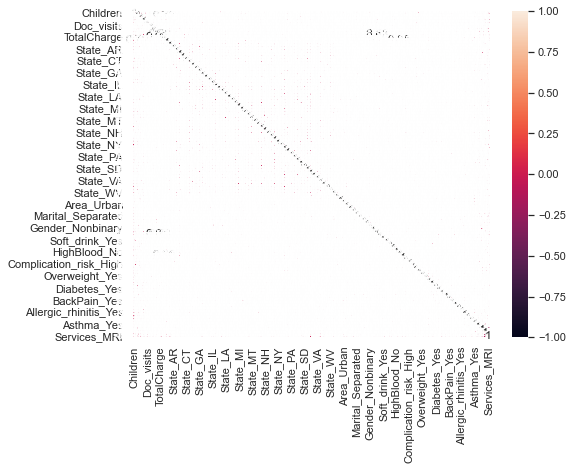

In [23]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [24]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [25]:
correlation_matrix = df.corr()

correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()


In [26]:

correlation_matrix["TotalCharge"].sort_values(kind="quicksort")

ReAdmis_No                            -0.843726
Complication_risk_Medium              -0.068781
Initial_admin_Observation Admission   -0.066870
Initial_admin_Elective Admission      -0.057207
BackPain_No                           -0.035828
                                         ...   
Complication_risk_High                 0.084038
Initial_admin_Emergency Admission      0.106985
ReAdmis_Yes                            0.843726
Initial_days                           0.987640
TotalCharge                            1.000000
Name: TotalCharge, Length: 109, dtype: float64

In [27]:
ay = abs(df.corr())['TotalCharge'].to_string()


In [28]:
df_corr = df.corr().stack().reset_index()

# rename the columns
df_corr.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']

# create a mask to identify rows with duplicate features as mentioned above
mask_dups = (df_corr[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (df_corr['FEATURE_1']==df_corr['FEATURE_2']) 

# apply the mask to clean the correlation dataframe
df_corr = df_corr[~mask_dups]

In [29]:
print(df_corr)

                  FEATURE_1             FEATURE_2  CORRELATION
1                  Children                   Age     0.009836
2                  Children                Income     0.007176
3                  Children           VitD_levels     0.009487
4                  Children            Doc_visits    -0.002292
5                  Children      Full_meals_eaten     0.003835
...                     ...                   ...          ...
11552   Services_Blood Work  Services_Intravenous    -0.711759
11553   Services_Blood Work          Services_MRI    -0.209577
11661      Services_CT Scan  Services_Intravenous    -0.252196
11662      Services_CT Scan          Services_MRI    -0.074259
11771  Services_Intravenous          Services_MRI    -0.134152

[5886 rows x 3 columns]


In [30]:
gang = correlation_matrix["ReAdmis_Yes"].sort_values(kind="quicksort").reset_index()

In [31]:
gang

index  ReAdmis_Yes
0              ReAdmis_No    -1.000000
1        Marital_Divorced    -0.021682
2    Services_Intravenous    -0.020313
3                State_KY    -0.018883
4                State_NH    -0.018715
..                    ...          ...
104              Children     0.023532
105      Services_CT Scan     0.024395
106           TotalCharge     0.843726
107          Initial_days     0.850862
108           ReAdmis_Yes     1.000000

[109 rows x 2 columns]

In [71]:
pd.set_option('display.max_rows', gang.shape[0]+1)
display(gang.sort_values(by='ReAdmis_Yes'))


index  ReAdmis_Yes
0                             ReAdmis_No    -1.000000
1                       Marital_Divorced    -0.021682
2                   Services_Intravenous    -0.020313
3                               State_KY    -0.018883
4                               State_NH    -0.018715
5                               State_AZ    -0.017314
6                             Asthma_Yes    -0.017133
7                               State_ID    -0.015970
8                               State_KS    -0.015161
9                            BackPain_No    -0.013313
10                      Full_meals_eaten    -0.012172
11   Initial_admin_Observation Admission    -0.011972
12                         Gender_Female    -0.011663
13                                Income    -0.011504
14      Initial_admin_Elective Admission    -0.010880
15                              State_IA    -0.010467
16                              State_WV    -0.010126
17                              State_IN    -0.009822
18                              State_ME    -0.009000
19                        Overweight_Yes    -0.008586
20                              State_OH    -0.008133
21                              State_NV    -0.007899
22                         Soft_drink_No    -0.007703
23                          Arthritis_No    -0.007663
24                            Area_Rural    -0.007501
25                              State_NM    -0.006682
26                              State_VA    -0.006587
27                              State_MA    -0.006282
28                              State_DE    -0.006232
29                              State_WA    -0.006182
30                              State_SD    -0.005890
31                 Reflux_esophagitis_No    -0.005422
32                              State_VT    -0.005411
33                              State_NY    -0.005249
34                              State_WY    -0.004986
35                              State_TN    -0.004782
36                 Allergic_rhinitis_Yes    -0.004651
37                     Hyperlipidemia_No    -0.004307
38                              State_AK    -0.004188
39                Complication_risk_High    -0.003976
40                              State_MD    -0.003766
41                              State_UT    -0.003477
42                              State_FL    -0.003067
43                          Diabetes_Yes    -0.003058
44                              State_PR    -0.002463
45                            Anxiety_No    -0.002406
46                              State_LA    -0.002345
47                          HighBlood_No    -0.002270
48                              State_MT    -0.002155
49                              State_HI    -0.001692
50                              State_NC    -0.001573
51                             Stroke_No    -0.000918
52                   Services_Blood Work    -0.000718
53                              State_PA    -0.000634
54                     Marital_Separated    -0.000536
55                              State_MS    -0.000297
56                            Doc_visits     0.000246
57                         Area_Suburban     0.000421
58                              State_AR     0.000439
59                            Stroke_Yes     0.000918
60                 Complication_risk_Low     0.001186
61                              State_CO     0.002073
62                         HighBlood_Yes     0.002270
63                           Anxiety_Yes     0.002406
64              Complication_risk_Medium     0.002799
65                           Diabetes_No     0.003058
66                              State_NE     0.003270
67                              State_NJ     0.003827
68                           VitD_levels     0.004083
69                    Hyperlipidemia_Yes     0.004307
70                  Allergic_rhinitis_No     0.004651
71                              State_ND     0.004767
72                              State_RI     0.004791
73                Reflux_esophagitis_Ye

In [150]:
kdf = df[['ReAdmis_Yes','Initial_days','TotalCharge','Initial_admin_Emergency Admission','Services_CT Scan',\
         'Children','State_SC','State_TX','Asthma_No','State_IL','Age']]

In [73]:
print(abs(kdf.corr())['ReAdmis_Yes'].to_string())

ReAdmis_Yes                          1.000000
Initial_days                         0.850862
TotalCharge                          0.843726
Initial_admin_Emergency Admission    0.019707
Services_CT Scan                     0.024395
Children                             0.023532
State_SC                             0.022217
State_TX                             0.018250
Asthma_No                            0.017133
State_IL                             0.015980
Age                                  0.015810


In [74]:
kdf.head()

ReAdmis_Yes  Initial_days  TotalCharge  Initial_admin_Emergency Admission  \
0            0     10.585770  3726.702860                                  1   
1            0     15.129562  4193.190458                                  1   
2            0      4.772177  2434.234222                                  0   
3            0      1.714879  2127.830423                                  0   
4            0      1.254807  2113.073274                                  0   

   Services_CT Scan  Children  State_SC  State_TX  Asthma_No  State_IL  Age  
0                 0         1         0         0          0         0   53  
1                 0         3         0         0          1         0   51  
2                 0         3         0         0          1         0   53  
3                 0         0         0         0          0         0   78  
4                 1         1         0         0          1         0   22

In [151]:
scale_vars = ['TotalCharge','Initial_days','Children','Age']
scaler = MinMaxScaler()
kdf[scale_vars] = scaler.fit_transform(kdf[scale_vars])

In [77]:
kdf.head()

ReAdmis_Yes  Initial_days  TotalCharge  Initial_admin_Emergency Admission  \
0            0      0.135022     0.246933                                  1   
1            0      0.199037     0.311343                                  1   
2            0      0.053117     0.068475                                  0   
3            0      0.010044     0.026168                                  0   
4            0      0.003562     0.024130                                  0   

   Services_CT Scan  Children  State_SC  State_TX  Asthma_No  State_IL  \
0                 0       0.1         0         0          0         0   
1                 0       0.3         0         0          1         0   
2                 0       0.3         0         0          1         0   
3                 0       0.0         0         0          0         0   
4                 1       0.1         0         0          1         0   

        Age  
0  0.492958  
1  0.464789  
2  0.492958  
3  0.845070  
4  0.056338

In [152]:
X = kdf.drop('ReAdmis_Yes', axis = 1).values
y= kdf['ReAdmis_Yes'].values
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X shape: (10000, 10)
y shape: (10000,)


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [137]:
dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(X_train, y_train)

In [127]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_0 <= 0.76
|   |--- feature_0 <= 0.73
|   |   |--- feature_0 <= 0.71
|   |   |   |--- feature_0 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.67
|   |   |   |   |--- feature_0 <= 0.67
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.67
|   |   |   |   |   |--- feature_1 <= 0.57
|   |   |   |   |   |   |--- feature_1 <= 0.57
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  0.57
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.57
|   |   |   |   |   |   |--- feature_1 <= 0.70
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  0.70
|   |   |   |   |   |   |   |--- feature_1 <= 0.70
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  0.70
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  0.71
|   |   |   |--- feature_0 <= 0.71
|   |   |   |   |--- class: 1
|   |   |   |--- 

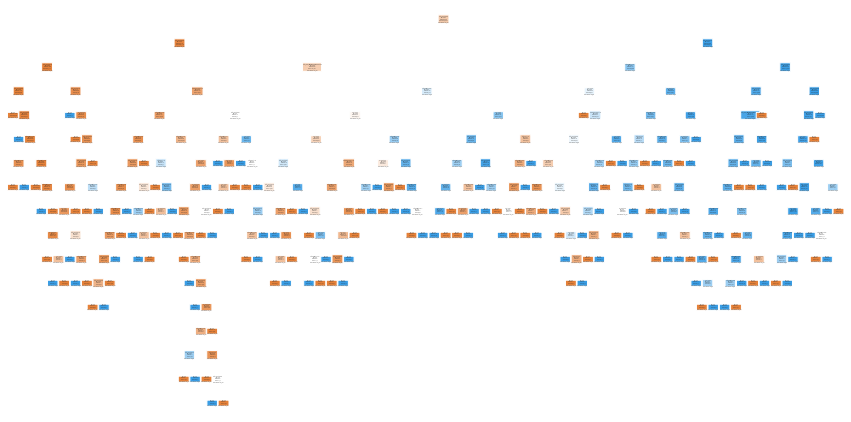

In [128]:
plt.figure(figsize=(15, 7.5))
plot_tree(dt,
         filled=True,
         rounded=True,
         class_names=['Readmitted_Yes','Readmitted_No'],
         feature_names=X.columns);

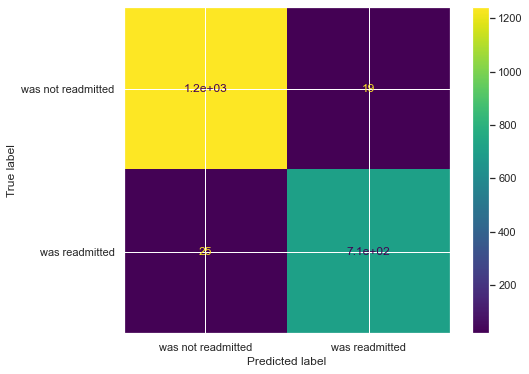

In [89]:
plot_confusion_matrix(dt,X_test,y_test, display_labels=["was not readmitted", "was readmitted"])

In [94]:
path = dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state = 0, ccp_alpha=ccp_alpha)
    dt.fit(X_train,y_train)
    clf_dts.append(dt)

In [95]:
train_scores = [dt.score(X_train,y_train) for dt in clf_dts]
test_scores = [dt.score(X_test,y_test) for dt in clf_dts]

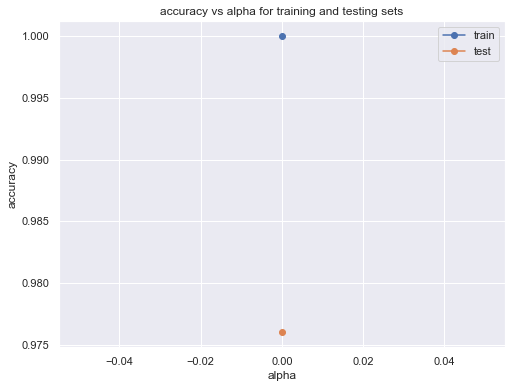

In [96]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()


<AxesSubplot:xlabel='tree'>

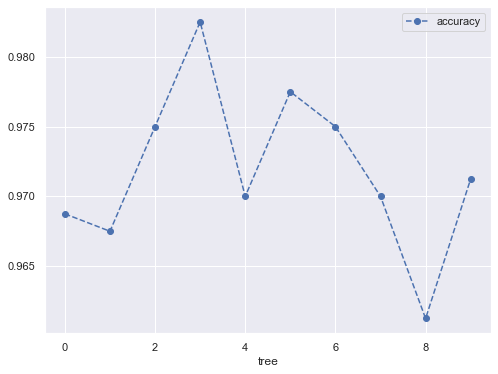

In [98]:
clf_dt = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree':range(10), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

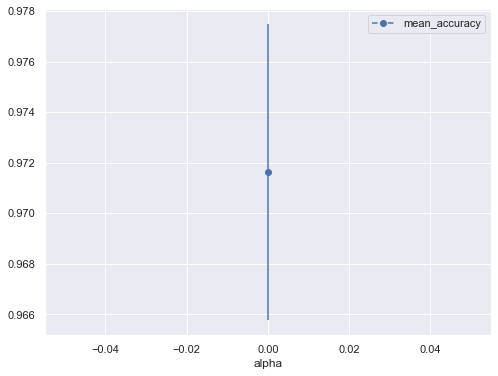

In [99]:
alpha_loop_values = []


for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train,y_train, cv=10)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy','std'])


alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='--')

In [100]:
for i, column in enumerate(kdf.drop('ReAdmis_Yes', axis = 1)):
    print('Importance of feature {}:, {:3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame ({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try: 
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()
final_fi

Importance of feature Initial_days:, 0.950589
Importance of feature TotalCharge:, 0.021518
Importance of feature Initial_admin_Emergency Admission:, 0.005173
Importance of feature Services_CT Scan:, 0.001598
Importance of feature Children:, 0.005404
Importance of feature State_SC:, 0.000000
Importance of feature State_TX:, 0.001188
Importance of feature Asthma_No:, 0.001717
Importance of feature State_IL:, 0.000489
Importance of feature Age:, 0.012325


index                           Variable  Feature Importance Score
0      0                       Initial_days                  0.950589
1      1                        TotalCharge                  0.021518
2      9                                Age                  0.012325
3      4                           Children                  0.005404
4      2  Initial_admin_Emergency Admission                  0.005173
5      7                          Asthma_No                  0.001717
6      3                   Services_CT Scan                  0.001598
7      6                           State_TX                  0.001188
8      8                           State_IL                  0.000489
9      5                           State_SC                  0.000000

In [154]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [155]:
print("Training Accuracy is: ", dt.score(X_train,y_train))
print("Testing Accuracy is: ", dt.score(X_test,y_test))

Training Accuracy is:  0.977625
Testing Accuracy is:  0.981


In [156]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

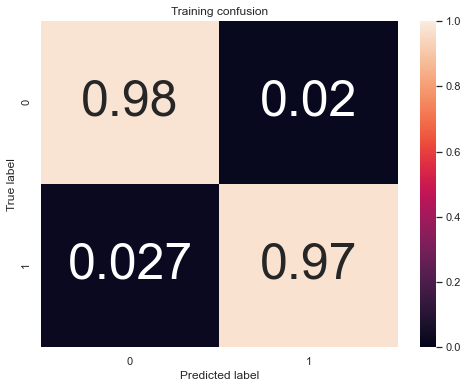

In [157]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [158]:
y_pred = dt.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[4969,  101],
       [  78, 2852]])

In [159]:

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

# Explenations:https://youtu.be/0HDy6n3UD5M

The True Positive rate / Recall per class is:  [0.980079 0.973379]
The Precision per class is:  [0.984545 0.965797]
The False Alarm rate per class is:  [0.026621 0.019921]
The Miss Rate rate per class is:  [0.019921 0.026621]
The Classification error of each class is [0.022375 0.022375]
The Accuracy of each class is [0.977625 0.977625]

The average Recall is:  0.9767288675269773
The average Precision is:  0.9751713842471355
The average False Alarm is:  0.023271132473022732
The average Miss Rate rate is:  0.023271132473022732
The average Classification error is 0.022375
The average Accuracy is 0.977625


In [120]:
kdf.to_csv('cleaned_data.csv', index=False)

In [138]:
X_train.tofile('X_train.csv',sep=',',format='%10.5f')

In [139]:
X_test.tofile('X_test.csv',sep=',',format='%10.5f')

In [140]:
y_train.tofile('y_train.csv',sep=',',format='%10.5f')


In [141]:
y_test.tofile('y_test.csv',sep=',',format='%10.5f')
